<div style="font-family: Times New Roman; font-size: 18px;">
<center>
    <h1>March Madness 2024</h1>
</center>
</div>

In [1]:
import pandas as pd
import numpy as np
from summarytools import dfSummary, tabset
import warnings
#pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<div style="font-family: Times New Roman; font-size: 18px;">
    <h2>Section 1 - The Basics</h2>
</div>

In [2]:
men_teams = pd.read_csv(r"data\MTeams.csv")
women_teams = pd.read_csv(r"data\WTeams.csv")

men_seasons = pd.read_csv(r"data\MSeasons.csv")
women_seasons = pd.read_csv(r"data\WSeasons.csv")

men_torneyseeds = pd.read_csv(r"data\MNCAATourneySeeds.csv")
women_torneyseeds = pd.read_csv(r"data\WNCAATourneySeeds.csv")

regular_men_game_results = pd.read_csv(r"data\MRegularSeasonCompactResults.csv")
regular_women_game_results = pd.read_csv(r"data\WRegularSeasonCompactResults.csv")

ncaa_men_game_results = pd.read_csv(r"data\MNCAATourneyCompactResults.csv")
ncaa_women_game_results = pd.read_csv(r"data\WNCAATourneyCompactResults.csv")

In [3]:
tabset({
    'Teams (Men)': dfSummary(men_teams).render(),
    'Teams (Women)': dfSummary(women_teams).render(),
    #
    'Seasons (Men)': dfSummary(men_seasons).render(),
    'Seasons (Women)': dfSummary(women_seasons).render(),
    #
    'Seeds (Men)': dfSummary(men_torneyseeds).render(),
    'Seeds (Women)': dfSummary(women_torneyseeds).render(),
    #
    'Game Results (Men)': dfSummary(regular_men_game_results).render(),
    'Game results (Women)': dfSummary(regular_women_game_results).render(),
    #
    'NCAA Game Results (Men)': dfSummary(men_torneyseeds).render(),
    'NCAA Game Results (Women)': dfSummary(women_torneyseeds).render()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TeamID[int64],Mean (sd) : 1289.5 (109.3)min < med < max:1101.0 < 1289.5 < 1478.0IQR (CV) : 188.5 (11.8),378 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABD0lEQVR4nO3VsW2DYBRFYduKBMVLi4s0Fgt4Ak/gKhO8veiYwJ03yB5pUpiaHveWkCAxceJzvhJ+oSsOEuthGFZ6fptHD9DveBm7UVXVe0Rspzyk7/tdRHwucPbSdd1pytkF9y6y4Rs7frR5NHREbDPza8qD27Y9ZObHvc82TXOs63rSiyvLcp+Z5/+yYe6OmWffbq+Nhv4LiqJ4nfOxPeuGe/AfDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEFeyN1mUhs3liAAAAABJRU5ErkJggg=="">",0(0.0%)
2,TeamName[object],1. Abilene Chr2. Rice3. Sam Houston St4. Sacred Heart5. S Illinois6. S Dakota St7. S Carolina St8. Rutgers9. Robert Morris10. Rider11. other,1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)1 (0.3%)368 (97.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACIUlEQVR4nO3aoW3DUBhG0Wer0DQKKG/n6QSeLRN0n/KAGpu7qDwysa50zgRPutIP/Hk6jmPQNF/9AM4TL0y8MPHCxAsTL0y8sHmaps+rH8E58xjj4+pHcI6zGSZemHhh4oWJFyZemHhh4oWJFyZe2DzG+Ln6EZwz+QGpy9kMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2QwzCYWZhMKczTDxwsQLEy9MvDDxwsQLEy9MvDDxwkxCYSahMGczzCQUZhIKczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczTCTUJhJKMzZDBMvTLww8cLECxMvTLww8cLECxMvTLwwe16YPS/M2Qyz54XZ88KczTDxwsQLEy9MvDDxwsQLEy9MvDDxwkxCYSahMGczzCQUZhIKczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczbDpdrt9Lctyv/ohvG7f999t277flmW5r+v6vPpBvO7xeLyP4WymiRcmXph4YeKFiRcmXph4YeKFiRfm22bQ/7dNk1CYsxkmXph4YeKFiRcmXtgfhqxFEDsGQrkAAAAASUVORK5CYII="">",0(0.0%)
3,FirstD1Season[int64],Mean (sd) : 1989.4 (9.4)min < med < max:1985.0 < 1985.0 < 2024.0IQR (CV) : 1.0 (210.9),31 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABI0lEQVR4nO3cMUrEQBhA4ShCUvy22cJG5gLrPaw8wbSeKV1OYOd5bCxMnSYQiI1tYBZnV9z3vjbD8DNvSDk327Y1un63fz2ALuNu70Pf9y8RcSjZZJ7nr2ma3uqNpdp2Q0fEIef8WbLJOI4P9UbSOfjrhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSF23wK9ZsQHbauEXpblKaX0WrL2lIM7V5D/+KDtb8+iSui2be9LD24YhueUUtHAXdcdc87vtfdd1/XYNE3RvCde4seI+ChZ+7P+YpfzGyouV8T4hWakAAAAAElFTkSuQmCC"">",0(0.0%)
4,LastD1Season[int64],Mean (sd) : 2023.0 (5.5)min < med < max:1985.0 < 2024.0 < 2024.0IQR (CV) : 0.0 (366.2),14 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA20lEQVR4nO3cIQ4CMRBAUSArR3cFhitxgp6tJ+BKGMRW13ctgZAUARv4/8lmxCQ/qZx9732n/3fYegF9x7T1AhqTUjpHxDwy21pbaq2X+zdD/4iImHPOt5HZUsrx8c2vG8LQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIV5e933zbPApIq6Ds08nhvV5K93IG6KZ600BAAAAAElFTkSuQmCC"">",0(0.0%)
No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TeamID[int64],Mean (sd) : 3289.5 (109.1)min < med < max:3101.0 < 3289.5 < 3478.0IQR (CV) : 187.5 (30.2),376 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABE0lEQVR4nO3VsU3DUBRGYUCR7OLROgUN8gJMkAmomODu5e5OQMcG7EFDgWv3pkex9FI4D+Wcr3SiXzc6lnK/ruudbt9D6wN0HYetD4ZheCulHGtGlmX5mef5vea7/2T3uZTy1fKGPbfP7W6GLqUcI+K7Zn

<div style="font-family: Times New Roman; font-size: 18px;">
    
</div>

<div style="font-family: Times New Roman; font-size: 18px;">
    <h2>Section 2 - Team Box Scores</h2>
</div>

<div style="font-family: Times New Roman; font-size: 16px;">
    <p>Team Box Scores are provided in "Detailed Results" files rather than "Compact Results" files. However, the two files are strongly related.
    <br>
    <br>
In a Detailed Results file, the first eight columns (<b>Season, DayNum, WTeamID, WScore, LTeamID, LScore, WLoc, and NumOT</b>) are exactly the same as a Compact Results file. However, in a Detailed Results file, there are many additional columns. The column names should be self-explanatory to basketball fans (as above, "W" or "L" refers to the winning or losing team):</p>
    <ul>
        <li><b>WFGM</b> - field goals made (by the winning team)</li>
        <li><b>WFGA</b> - field goals attempted (by the winning team)</li>
        <li><b>WFGM3</b> - three pointers made (by the winning team)</li>
        <li><b>WFGA3</b> - three pointers attempted (by the winning team)</li>
        <li><b>WFTM</b> - free throws made (by the winning team)</li>
        <li><b>WFTA</b> - free throws attempted (by the winning team)</li>
        <li><b>WOR</b> - offensive rebounds (pulled by the winning team)</li>
        <li><b>WDR</b> - defensive rebounds (pulled by the winning team)</li>
        <li><b>WAst</b> - assists (by the winning team)</li>
        <li><b>WTO</b> - turnovers committed (by the winning team)</li>
        <li><b>WStl</b> - steals (accomplished by the winning team)</li>
        <li><b>WBlk</b> - blocks (accomplished by the winning team)</li>
        <li><b>WPF</b> - personal fouls committed (by the winning team)</li>
    </ul>
    <p>(and then the same set of stats from the perspective of the losing team: <b>LFGM</b> is the number of field goals made by the losing team, and so on up to <b>LPF</b>).</p>
    <p><b>Note:</b> by convention, "field goals made" (either WFGM or LFGM) refers to the total number of fields goals made by a team, a combination of both two-point field goals and three-point field goals. And "three point field goals made" (either WFGM3 or LFGM3) is just the three-point fields goals made, of course. So if you want to know specifically about two-point field goals, you have to subtract one from the other (e.g., WFGM - WFGM3). And the total number of points scored is most simply expressed as 2*FGM + FGM3 + FTM.</p>
</div>

In [4]:
men_regseason_results_det = pd.read_csv(r"data\MRegularSeasonDetailedResults.csv")
women_regseason_results_det = pd.read_csv(r"data\WRegularSeasonDetailedResults.csv")

ncaa_men_results_det = pd.read_csv(r"data\MNCAATourneyDetailedResults.csv")
ncaa_women_results_det = pd.read_csv(r"data\WNCAATourneyDetailedResults.csv")

In [5]:
men_regseason_results_det.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [6]:
tabset({
    'Regular season results (Men)': dfSummary(men_regseason_results_det).render(),
    'Regular season results (Women)': dfSummary(women_regseason_results_det).render(),
    #
    'NCAA results (Men)': dfSummary(ncaa_men_results_det).render(),
    'NCAA results (Women)': dfSummary(ncaa_women_results_det).render()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Season[int64],Mean (sd) : 2013.6 (6.2)min < med < max:2003.0 < 2014.0 < 2024.0IQR (CV) : 11.0 (323.1),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRUlEQVR4nO3ZMUrEQBhA4SjCphjbbGEjucB6gT2EJ5jWa80J7LyB97CxMHWaQCA2W4iwMGHjJO57Xxl+2JDHDpPJzTRNla7f7do3oDLu1r4B5Wma5jmEsM+Z7fv+q+u615/XDP1PhBD2McbPnNmU0sPvay7dEIaGMDSEoSHObsYu3eVpW86GvnSXp21x6YYwNIShIQwNYWgIQ0MYGgL59WrmYdBjCOFj6dnTfLGDpuKht/CQ67o+xBjfcmZTSscY4/vSs6f5YgdNxUPPPHH7k4ecUjrmzF2TRUIPw/DUtu1Lzuw4joeqqrJCazmLhN7tdvdz/qVL/KbmQW7GtqLkSmjoFZVcCX2PhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0xDdSAWWijvsPEQAAAABJRU5ErkJggg=="">",0(0.0%)
2,DayNum[int64],Mean (sd) : 70.6 (35.6)min < med < max:0.0 < 74.0 < 132.0IQR (CV) : 61.0 (2.0),133 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABU0lEQVR4nO3aMW6DMBSH8dcqEou7kqGbL9BeoCfo1BOw5kxsnKCn6lBmFiQkeoGg8lpsLP+/34wiS58D5DkP67oa6vd49gKQx+XsBZyhbduPEMJ1z7XTNH2P4/iZek2pSYYOIVy7rvvac+0wDM97P9ezgczybiLJ0Kl4NpCZWd/37zHGLHcWQv9inufXGONtz7XLsryY2e7QTdM8pbiz3HNI6Jqfec4Yb6nX81eHhE71zMNx+HklgtAiCC2C0CIILYLQIggtoujJWM2DmNyKDu0ZxHjmxt5RZQk8o9h7m77o0B61jCq3/Hcunj10ykMCbMseuvZvXql46xZBaBGEFkFoEYQWQWgRhBZBaBGEFkFoEYQWsTnr9pwFc/hQvs3Qzj/lc/hQOG7dIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CJ+AMAAehHdY7/cAAAAAElFTkSuQmCC"">",0(0.0%)
3,WTeamID[int64],Mean (sd) : 1288.1 (105.2)min < med < max:1101.0 < 1287.0 < 1478.0IQR (CV) : 182.0 (12.2),369 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABSUlEQVR4nO3ZMU6EQBhA4dGY0IwtW9gYLqAX2EN4AlqvxQk8hfewsZCahoRkLS3WTWaEAZf3vnoykDz4Q4ab0+kUtH+3W9+A1nG39Q2Q1XX9EmM8pKwdhuGr7/u3v17L0BuKMR7atv1MWdt13cOca+0mdKm3I3PfxxjjR8raEEKYpukphJAUeq7VQ5cKUurtyNz32Lbte+reXdcdU9fOtXroNceVfiwSOuctzRlX4zg+N03zuvS+RIuEzh1vqftWVXVfYl/iA7Sbj7EcpR6g/+xi6FLjWNu4GLrUONY2PAKFMDSEoSEMDWFoCENDGBoCeTJ2jXKObX/762foK5F5bHv218/RDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BDf7ihzbCcwTnoAAAAASUVORK5CYII="">",0(0.0%)
4,WScore[int64],Mean (sd) : 75.7 (11.0)min < med < max:34.0 < 75.0 < 149.0IQR (CV) : 15.0 (6.9),104 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABGUlEQVR4nO3avw2CQBhAcTQmNGcLhR0L6AIO4QS0rsUETmUhNQ0JCU6g4RL+v/err7jkJR+a+w593yfav+PSF9A8Tktf4J8syx4hhHzI2aZpPnVdv6a+01atOnQIIS/L8j3kbFVVl6nvs2WObghDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGWPXrVYy2bW9FUTyHnCU+ae4mdJqmZ580f3N0QxgawtAQs3+jY/bAuq67Jkky6Lur/2YPHbkHdp/6PhSObghDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCEND7GavOwZx2R8Zmrjs7+iGMDTEKKPbXe31GyW0u9rr5+iGQP7qjrGXv2JfWw9LrSAucZcAAAAASUVORK5CYII="">",0(0.0%)
5,LTeamID[int64],Mean (sd) : 1282.7 (104.6)min < med < max:1101.0 < 1281.0 < 1478.0IQR (CV) : 183.0 (12.3),369 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABV0lEQVR4nO3ZMU6GMBiH8VdjAkNd+QYXwwU+L+AhPEFXr8UJ3LyB93BxkJmFhIRvMG5+Sd8UsPB/fnPTQJ/QJvRmnmfD8d3+9wNgG3dLTNI0zUsI4ZQydhiGxxDCZ+LY777v37IeDma2UOgQwinG+JUytuu65xjjR+LYh7wnw69FQuOHZ2cz23bHOkxo5/GRvMCeeeu6PscY31PGmm27YxUdehzHp7ZtX1PGehbZs8DeYyl1XjPf++V+/UWHrqrqfq1FLoHz/bK+/qJDr8XzJU3TdDazpBgluxraczbtbTGOvlP85WroNc8mbI8/YyIILYLQIggtgtAiCC2C0CIILYLQIggtQvJSY49yrzQJvRO5V5ps3SIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQI

<div style="font-family: Times New Roman; font-size: 18px;">
    <h2>Section 3 - Geography</h2>
</div>

<div style="font-family: Times New Roman; font-size: 16px;">
    <p> This section  provides a master list of cities that have been locations for games played. Please notice that the Cities and Conferences files are the only two that don't start with an M; this is because the data files are identical between men's and women's data, so you don't need to maintain separate listings of cities or conferences across the two datasets. Also note that if you created any supplemental data in previous years on cities (latitude/longitude, altitude, city-to-city distances, etc.), the CityID's match between previous years and this year, so you should be able to re-use that information.</p>
    <ul>
        <li><b>CityID</b> - a four-digit ID number uniquely identifying a city.</li>
        <li><b>City</b> - the text name of the city.</li>
        <li><b>State</b> - the state abbreviation of the state that the city is in. In a few rare cases, the game location is not inside one of the 50 U.S. states and so other abbreviations are used. For instance Cancun, Mexico has a state abbreviation of MX.</li>
    </ul>
</div>

In [7]:
cities = pd.read_csv(r"data\Cities.csv")

cities_men = pd.read_csv(r"data\MGameCities.csv")
cities_women = pd.read_csv(r"data\WGameCities.csv")

In [8]:
tabset({
    'Cities(All)': dfSummary(cities).render(),
    #
    'Cities (Men games)': dfSummary(cities_men).render(),
    'Cities (Women games)': dfSummary(cities_women).render()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CityID[int64],Mean (sd) : 4246.7 (146.1)min < med < max:4001.0 < 4242.0 < 4505.0IQR (CV) : 242.0 (29.1),483 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABV0lEQVR4nO3ZMW6DMBiGYbeKBIO7kqFL5QukF8gJOvUEXnMmNk7QrTfoPbp0KLMXJCR6AZD8C1NQvvdZg6xfeoPjwMM0TQ7373HvAfA/TksfNE3z7r0/5yySUvrt+/4j59qt1rU4wgxWa2deDO29P8cYf3IWbtv2LYSQNURd15cY42fpdVNKL97779IzdF33nHPd1iw95mZeDG1RVdWTYYjrVuvGGL9KzzAMw2sI4ZZz7VHu/jlFQt8z45ftEHf/HA5jIggtgq17R5aT9DiOF+dc1k/IHELvyHiSzj5AzmHrFkFoEYQWQWgRhBZBaBGEFsH/6IIsL0CcW/8QxILQBVlegDi3/iGIBVu3CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCiyC0iD9rDWp2fyl4ZAAAAABJRU5ErkJggg=="">",0(0.0%)
2,City[object],1. Charleston2. Springfield3. Greenville4. Easton5. Huntsville6. Durham7. Richmond8. Jacksonville9. Bloomington10. Rochester11. other,4 (0.8%)4 (0.8%)3 (0.6%)2 (0.4%)2 (0.4%)2 (0.4%)2 (0.4%)2 (0.4%)2 (0.4%)2 (0.4%)458 (94.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACQElEQVR4nO3aMWrjUBhG0Sfj8rXCxfST9WQFXptXkP2knyKq1XvaMAwhUSMunFOqenDhL/x5eT6fg6bL2Q/gOPHCxAsTL0y8MPHCxAtb1nV9HWOMbdvezn4MP3Odc97OfgTHOJth4oWJFyZemHhh4oWJFyZemHhh4oVd933/OPsRHLP4A1KXsxlmEgozCYU5m2HihYkXJl6YeGHihYkXJl6YeGHihZmEwkxCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2GXZVlezn4Ex1zGGL/PfgTHOJth4oWJFyZemHhh4oWJFyZemHhh4oVdxhjvZz+CY0xCYc5mmEkozCQU5myGiRcmXph4YeKFiRcmXph4YeKFiRdmEgozCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGEmoTCTUJizGWYSCjMJhTmbYeKFiRcmXph4YeKFiRcmXph4YeKFiRdmzwuz54U5m2H2vDB7XpizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGEmoTCTUJizGbas6/o657yd/RC+tu/7x7Ztb5+/Xeect/v9/uesR/E9j8fj17/fnM0w8cLECxMvTLww8cLECxMvTLww8cL8thnxv982TUJhzmaYeGHihYkXJl6YeGF/AZuUWZLX/kGNAAAAAElFTkSuQmCC"">",0(0.0%)
3,State[object],1. NY2. FL3. CA4. TX5. NC6. IL7. MS8. LA9. NJ10. SC11. other,32 (6.6%)31 (6.4%)30 (6.2%)29 (6.0%)19 (3.9%)16 (3.3%)15 (3.1%)15 (3.1%)14 (2.9%)14 (2.9%)268 (55.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACKUlEQVR4nO3dsWnDYBhF0SikVCtceKpMoNk0QaZKEdXqlVrIhUnhcO1zWjeGCy/wf4YM+76/0fT+31+AvxMvTLww8cLECxMvTLywYZqmz3EcL7c+3LbtZ13Xr0d/Ke7zMY7jZZ7n71sfLstyffQX4n5mM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYYMfIHWZzTCzGeYkFGY2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87YZ5iQUZjbDzGaYk1CY2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8zbZpiTUJjZDDObYU5CYWYzTLww8cLECxMvTLww8cLECxMvTLwwb5thTkJhZjPsNJumsuN0EnIG6jCbYeKFiRcmXph4YeKFiRcmXph4YeKFedsMcxIKM5thZjPMSSjMbIaJFyZemHhh4oWJFyZemHhh4oWJF+ZtM8xJKMxshh1m02S2HE5CzkEtZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM8xshjkJhZnNMPHCxAsTL0y8MPHCxAsTL0y8MPHCxAvzMB3mnhdmNsPMZph7XpjZDBMvTLww8cLECxMvTLww8cLECxMvzNtmmJNQmNkMM5thTkJhZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM+z0//NexTP8iTichF7JM5y/zGaYeGHihYkXJl6YeGHihYkXJl6YeGHeNsOchMLMZph4YeKFiRcmXph4Yb+JdAON9A73vwAAAABJRU5ErkJggg=="">",0(0.0%)
No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Season[int64],Mean (sd) : 2016.9 (4.3)min < med < max:2010.0 < 2017.0 < 2024.0IQR (CV) : 7.0 (469.9),15 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABRElEQVR4nO3aMU7DMBhAYYOQspg1HVhQLgAX4BCcwCvXygk4BfdgYSBzlkiRwl6pkp0mJup73/zLtfqU1FF6tyxL0O27/+8NqI6H2h/Ytu17jPGUMzuO4+8wDJ+3uIfaLobe68uIMZ5SSj85s33fP+XMlTrCHmq7GJr4ZRzZtRde9Vu31rn2wvMwBmFoCENDGBrCw9iGSk7GIdR9Rjf0hkpOxiHUfSz11g1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGOPRrymmaXruu+8iZHcfxOcb4nTM7z

<div style="font-family: Times New Roman; font-size: 18px;">
    <h2>Section 4 - Public rankings</h2>
</div>

In [9]:
rankings = pd.read_csv(r"data\MMasseyOrdinals.csv")
dfSummary(rankings)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Season[int64],Mean (sd) : 2015.0 (5.8)min < med < max:2003.0 < 2016.0 < 2024.0IQR (CV) : 9.0 (345.3),22 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABUklEQVR4nO3aMW6DMBiGYVpFYvm7kiFLxQWSC/QQOYHXXIsT5BS5R5cOYWZBQiJrFSWKHcAYvvcZEUJILzZG5qPv+wzr9zn3DSCOzdw3AD9FURzNbOtzbtM017quz/+PEXohzGzrnPvzObeqqt39MaZuEYQWQWgRhBZBaBGEFkFoEYQWQWgRhBZBaBGEFsGmxguBu0bfZvbre+1Hu0xTIfQLgbtGP865i++1H+0yTUUydMgo7bpun2WZV+iUSYYOHaVT308MqwmtOEpDrCb0Ekdp27aHsixPPucOfThXE3qJ8jz/ivVw8h0tgtAikp66WWCNJ+nQS1xgpepp6KE/jCMtT0MP/WEcaWExJiL6O5oF1jyih2aBNQ+mbhGEFkFoEaO8o2PuwuA9o4SOuQuD9zB1iyC0CEKLILQIQosgtAhCiyC0CEKLILQIQosgtAhCi7gBmphtbIhqQZUAAAAASUVORK5CYII="">",0(0.0%)
2,RankingDayNum[int64],Mean (sd) : 85.1 (32.8)min < med < max:0.0 < 86.0 < 133.0IQR (CV) : 56.0 (2.6),90 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABPklEQVR4nO3ZPWqEQABA4UkI2Exat0jnBZIL5BA5gW2u5QlyqhSxthEE04Yly46szI7z3leKyMDD+WEe1nUNqt/jvQegPJ7uPQCladv2I8Z4Snl3mqafcRy//j4z9EHEGE9933+nvDsMw8v5M6duCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhobw9uqKW68H9/r2siyvIYSk26v/GPqKW68Hd/z2+5Zvn0OGzvknlQIZOuefVAo3YxCGhqhm6iauu1tUE5q47m7h1A1haIiip+6jrbvzPL91XfeZ+n7OMRcd+mjrbtM0z6njDSHvmJ26IQwNYWgIQ0MYGiL7rvtoR6ZaZA99tCNTLZy6IQwNYWgIQ0MYGmKXXbdHpvLtEtojU/mcuiEMDWFoCENDGBri4q7bI1NdLob2yFSXXwENaJGCIml3AAAAAElFTkSuQmCC"">",0(0.0%)
3,SystemName[object],1. MOR2. POM3. SAG4. DOK5. MAS6. WLK7. DOL8. WIL9. PGH10. COL11. other,"135,173 (2.6%)132,682 (2.5%)130,371 (2.5%)119,386 (2.3%)109,080 (2.1%)108,626 (2.1%)106,152 (2.0%)104,435 (2.0%)103,171 (2.0%)99,175 (1.9%)4,056,376 (77.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACMUlEQVR4nO3asWnDUBhG0SfjUq1x4akygWbTBJkqRVyrdyq7NgEhbnLOAIngwhd4f6bH4zFoOh39AfyeeGHihYkXJl6YeGHihU2Xy+VjnufrGGNs2/Z9v98/j/4o3nOe5/m6LMvXGGOs63o7+oN4n9kMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22bY5B+QusxmmNkMcxIKM5th4oWJFyZemHhh4oWJFyZemHhh4oV52wxzEgozm2FmM8xJKMxshokXJl6YeGHihYkXJl6YeGHihYkX5m0zzEkozGyGmc0wJ6EwsxkmXph4YeKFiRcmXph4YeKFiRcmXpi3zTAnoTCzGfaaTZPZc3qehJ5/9+gwm2HihYkXJl6YeGHihYkXJl6YeGHihXnbDHMSCjObYWYzzEkozGyGiRcmXph4YeKFiRcmXph4YeKFiRfmbTPMSSjMbIaZzTAnoTCzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZZjbDnITCzGaYeGHihYkXJl6YeGHihYkXJl6YeGHihXmYDnPPCzObYWYzzD0vzGyGiRcmXph4YeKFiRcmXph4YeKFiRfmbTPMSSjMbIaZzTAnoTCzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZ9prNoz/kL9r7T9H5eRLa6xf8Z+u63vb8+WYzTLww8cLECxMvTLww8cLECxMvTLwwb5s72vtt00kozGyGiRcmXph4YeKFiRf2A4Gj+OCK/Jh2AAAAAElFTkSuQmCC"">",0(0.0%)
4,TeamID[int64],Mean (sd) : 1285.4 (105.0)min < med < max:1101.0 < 1284.0 < 1478.0IQR (CV) : 182.0 (12.2),369 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABT0lEQVR4nO3ZsW2EMBiG4T9RJCiclivSeYHLApkgVSZwm5noPEG6bJQi1DRISGSBO8nW2Q7H9z61JWxeg5B52LbNcHyP/z0BtPHU+oLDMHw4504pY+d5/p2m6av2nErJWZtZ2/UVCZ2zwL7vzyGE75SxMcaXGnPIucG11mZmNo7ju/e+yaYvEto5dwoh/KSMjTG+lbjmjXNI3kA119Z13XONOV/S/NWdY1mWV+/9Z8rYdV3PZpZ00xTtOnTmjk9+mhQ30K5D11JrA+3Z1dA5HyFH2fVHdjX0Hj6wUA4HJiIILYLQIggtgtAiCC2C0CIILULyCPQe5ZzPX/qlSeg7cesvTV7dIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILeIPWRxu/GzgIuQAAAAASUVORK5CYII="">",0(0.0%)
5,OrdinalRank[int64],Mean (sd) : 173.4 (101.3)min < med < max:1.0 < 173.0 < 363.0IQR (CV) : 176.0 (1.7),363 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwga

<div style="font-family: Times New Roman; font-size: 18px;">
    <h2>Section 5 - Supplements</h2>
</div>

In [10]:
tournament_slots_men = pd.read_csv(r"data\MNCAATourneySlots.csv")
tournament_slots_women= pd.read_csv(r"data\WNCAATourneySlots.csv")

In [11]:
tabset({
    'Tournament_slots(Men games)': dfSummary(tournament_slots_men).render(),
    'Tournament_slots(Women games)': dfSummary(tournament_slots_women).render()
})

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Season[int64],Mean (sd) : 2003.8 (11.1)min < med < max:1985.0 < 2004.0 < 2023.0IQR (CV) : 19.0 (180.0),38 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABOUlEQVR4nO3YsU3DQBhAYYMiuTlap6BBXgAWyBBMcC1reQKmYA8aCly7sWTJDACR7kIuTu69r/6Lk5/Psv67dV0b1e9+6wPoMnZbH6AmXde9hhD2qfPTND2FED4TZ7/HcXw/9WyGPqMQwj7G+JU6PwzDIcb4kTj7ePrJoKFzbl7OrVuW5blpmuTQl3Q0dKmHUXA2+dOWc/Myb90hZW4LR0OXfBiFZv/1aaudf90QhoYwNIShIQwNYWgIQ0MgN2O3aJ7nl77v31Jm/1oeGfpGtG37kLHA+rU8qiZ0zht/zTvpUqoJnfnGX+1OuhR/xiAMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0xA+QR2iYoas6CAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Slot[object],1. R1W12. R2W13. R2W34. R2W45. R2X16. R2X27. R1W28. R2X49. R2Y110. R2Y211. other,"38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)2,072 (84.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACIklEQVR4nO3aMUrEUBhGUTNYvjakcFWuIGvLClyVhVOnj5XWowbCxXMWIIELn/D+mY7jeKLpdvUH8HvihYkXJl6YeGHihYkXNs3z/DrGWPZ9/7jf729XfxCPu40xlnVd38cYy9Ufw8+YzTDxwsQLEy9MvDDxwsQLEy9MvDDxwrxthk1+gNRlNsPMZpiTUJjZDBMvTLww8cLECxMvTLww8cLECxMvzNtmmJNQmNkMM5thTkJhZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM8xshjkJhZnNMPHCxAsTL0y8MPHCxAsTL0y8MPHCvG2GOQmFmc0wsxnmJBRmNsPECxMvTLww8cLECxMvTLww8cLEC/O2GeYkFGY2w8xmmJNQmNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22aYk1CY2Qwzm2FOQmFmM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYU5CYWYzzGyGOQmFmc0w8cLECxMvTLww8cLECxMvTLww8cLEC/MwHeaeF2Y2w8xmmHtemNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22aYk1CY2Qwzm2FOQmFmM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYU5CYWYz7Hs2r/6Q/+aMf1PPXyehsz6Kx2zb9vLXv2E2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87Z5kTPeNp2EwsxmmHhh4oWJFyZemHhhn8rN8cztAfHaAAAAAElFTkSuQmCC"">",0(0.0%)
3,StrongSeed[object],1. W012. R1W13. R1W34. R1W45. R1X16. R1X27. W028. R1X49. R1Y110. R1Y211. other,"38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)2,072 (84.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACIklEQVR4nO3aMUrEUBhGUTNYvjakcFWuIGvLClyVhVOnj5XWowbCxXMWIIELn/D+mY7jeKLpdvUH8HvihYkXJl6YeGHihYkXNs3z/DrGWPZ9/7jf729XfxCPu40xlnVd38cYy9Ufw8+YzTDxwsQLEy9MvDDxwsQLEy9MvDDxwrxthk1+gNRlNsPMZpiTUJjZDBMvTLww8cLECxMvTLww8cLECxMvzNtmmJNQmNkMM5thTkJhZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM8xshjkJhZnNMPHCxAsTL0y8MPHCxAsTL0y8MPHCvG2GOQmFmc0wsxnmJBRmNsPECxMvTLww8cLECxMvTLww8cLEC/O2GeYkFGY2w8xmmJNQmNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22aYk1CY2Qwzm2FOQmFmM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYU5CYWYzzGyGOQmFmc0w8cLECxMvTLww8cLECxMvTLww8cLEC/MwHeaeF2Y2w8xmmHtemNkMEy9MvDDxwsQLEy9MvDDxwsQLEy/M22aYk1CY2Qwzm2FOQmFmM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYU5CYWYz7Hs2r/6Q/+aMf1PPXyehsz6Kx2zb9vLXv2E2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87Z5kTPeNp2EwsxmmHhh4oWJFyZemHhhn8rN8cztAfHaAAAAAElFTkSuQmCC"">",0(0.0%)
4,WeakSeed[object],1. W162. R1W83. R1W64. R1W55. R1X86. R1X77. W158. R1X59. R1Y810. R1Y711. other,"38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)38 (1.5%)2,072 (84.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAACIklEQVR4nO3aMUrEUBhGUTNYvjakcFWuIGvLClyVhVOnj5XWowbCxXMWIIELn/D+mY7jeKLpdvUH8HvihYkXJl6YeGHihYkXNs3z/DrGWPZ9/7jf729XfxCPu40xlnVd38cYy9Ufw8+YzTDxwsQLEy9MvDDxwsQLEy9MvDDxwrxthk1+gNRlNsPMZpiTUJjZDBMvTLww8cLECxMvTLww8cLECxMvzNtmmJNQmNkMM5thTkJhZjNMvDDxwsQLEy9MvDDxwsQLEy9MvDBvm2FOQmFmM8xshjkJhZnNMPHCxAsTL0y8MPHCxAsTL0y8MPHCvG2GOQmFmc0wsxnmJBRmNsPECxMvTLww8cLECxMvTLww8cLEC/O2GeYkFGY2w8x

In [12]:
tournament_slots_men.tail()

,Season,Slot,StrongSeed,WeakSeed
2447,2023,R6CH,R5WX,R5YZ
2448,2023,W16,W16a,W16b
2449,2023,X16,X16a,X16b
2450,2023,Y11,Y11a,Y11b
2451,2023,Z11,Z11a,Z11b


In [13]:
seed_distribution = pd.read_csv(r"data\2024_tourney_seeds.csv")
seed_distribution.head()

,Tournament,Seed,TeamID
0,M,W01,1345
1,M,W02,1266
2,M,W03,1243
3,M,W04,1397
4,M,W05,1181


In [14]:
men_teams_2024 = ['Connecticut','Stetson','FL Atlantic','Northwestern','San Diego St','UAB','Auburn','Yale','BYU',
                  'Duquesne','Illinois','Morehead St','Washington St','Drake','Iowa St','S Dakota St','North Carolina',
                  'Howard','Wagner','Mississippi St','Michigan St',"St Mary's CA",'Grand Canyon','Alabama',
                  'Col Charleston','Clemson','New Mexico','Baylor','Colgate','Dayton','Nevada','Arizona','Long Beach St',
                  'Houston','Longwood','Nebraska', 'Texas A&M','Wisconsin','James Madison','Duke','Vermont','Texas Tech',
                  'NC State','Kentucky','Oakland','Florida','Boise St','Colorado','Marquette','Kentucky','Purdue',
                  'Montana St','Grambling','Utah St','TCU','Gonzaga','McNeese St','Kansas','Samford','South Carolina',
                  'Oregon','Creighton','Akron','Texas', 'Virginia','Colorado St','Tennessee',"St Peter's"]

In [15]:
men_regseason_results_det_ml = men_regseason_results_det[(men_regseason_results_det.Season >= 2016) & (men_regseason_results_det.Season <2025) ]
women_regseason_results_det_ml = women_regseason_results_det[(women_regseason_results_det.Season >= 2016) & (women_regseason_results_det.Season <2025)]

ncaa_men_results_det_ml = ncaa_men_results_det[(ncaa_men_results_det.Season >= 2016) & (ncaa_men_results_det.Season < 2025)]

In [16]:
men_regseason_results_det_ml['winner'] = men_regseason_results_det_ml.WTeamID

ncaa_men_results_det_ml['winner'] = ncaa_men_results_det_ml.WTeamID

In [17]:
men_regseason_results_det_ml.head(2)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,11,1104,77,1244,64,H,0,29,57,...,19,26,12,27,6,16,7,4,25,1104
65873,2016,11,1105,68,1408,67,A,1,25,64,...,16,26,18,30,11,19,6,7,21,1105


In [18]:
ncaa_men_results_det_ml.head(2)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
847,2016,134,1195,96,1192,65,N,0,34,57,...,11,18,9,24,16,9,9,1,26,1195
848,2016,134,1455,70,1435,50,N,0,22,59,...,15,26,9,29,9,12,1,5,23,1455


In [19]:
men_regseason_results_det_ml.drop(columns=['DayNum'], inplace=True)
ncaa_men_results_det_ml.drop(columns=['DayNum'], inplace=True)

men_regseason_results_det_ml.head(2)

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,1104,77,1244,64,H,0,29,57,4,...,19,26,12,27,6,16,7,4,25,1104
65873,2016,1105,68,1408,67,A,1,25,64,8,...,16,26,18,30,11,19,6,7,21,1105


In [20]:
ncaa_men_results_det_ml.head(2)

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
847,2016,1195,96,1192,65,N,0,34,57,8,...,11,18,9,24,16,9,9,1,26,1195
848,2016,1455,70,1435,50,N,0,22,59,7,...,15,26,9,29,9,12,1,5,23,1455


In [21]:
men_regseason_results_det_ml['WTeamID'] = men_regseason_results_det_ml['WTeamID'].astype(str)
men_regseason_results_det_ml['LTeamID'] = men_regseason_results_det_ml['LTeamID'].astype(str)
men_regseason_results_det_ml['winner'] = men_regseason_results_det_ml['winner'].astype(str)

ncaa_men_results_det_ml['WTeamID'] = ncaa_men_results_det_ml["WTeamID"].astype(str)
ncaa_men_results_det_ml['LTeamID'] = ncaa_men_results_det_ml["LTeamID"].astype(str)
ncaa_men_results_det_ml['winner'] = ncaa_men_results_det_ml["winner"].astype(str)

In [22]:
#Conversion og team columns
men_regseason_results_det_ml['match'] = men_regseason_results_det_ml['WTeamID'] + " vs. " + men_regseason_results_det_ml['LTeamID']
ncaa_men_results_det_ml['match'] = ncaa_men_results_det_ml['WTeamID'] + " vs. " + ncaa_men_results_det_ml['LTeamID']

In [23]:
#dropping team columns
men_regseason_results_det_ml.drop(columns=['WTeamID','LTeamID'], inplace=True)
ncaa_men_results_det_ml.drop(columns=['WTeamID','LTeamID'], inplace=True)
men_regseason_results_det_ml.head(3)

,Season,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner,match
65872,2016,77,64,H,0,29,57,4,17,15,...,26,12,27,6,16,7,4,25,1104,1104 vs. 1244
65873,2016,68,67,A,1,25,64,8,29,10,...,26,18,30,11,19,6,7,21,1105,1105 vs. 1408
65874,2016,79,61,H,0,24,61,6,20,25,...,19,5,23,9,9,3,1,25,1112,1112 vs. 1334


In [24]:
#rearranging the columns
men_regseason_results_det_ml = men_regseason_results_det_ml[['Season','match', 'WScore', 'LScore', 'WLoc', 'NumOT', 'WFGM', 
                                                             'WFGA', 'WFGM3','WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst',
                                                             'WTO', 'WStl', 'WBlk','WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
                                                             'LFTM', 'LFTA', 'LOR', 'LDR','LAst', 'LTO', 'LStl', 'LBlk', 
                                                             'LPF', 'winner']]

In [25]:
ncaa_men_results_det_ml = ncaa_men_results_det_ml[['Season','match', 'WScore', 'LScore', 'WLoc', 'NumOT', 'WFGM',
                                                   'WFGA', 'WFGM3','WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst',
                                                   'WTO', 'WStl', 'WBlk','WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
                                                   'LFTM', 'LFTA', 'LOR', 'LDR','LAst', 'LTO', 'LStl', 'LBlk', 
                                                   'LPF', 'winner']]

In [26]:
men_regseason_results_det_ml.head(3)

,Season,match,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,1104 vs. 1244,77,64,H,0,29,57,4,17,...,19,26,12,27,6,16,7,4,25,1104
65873,2016,1105 vs. 1408,68,67,A,1,25,64,8,29,...,16,26,18,30,11,19,6,7,21,1105
65874,2016,1112 vs. 1334,79,61,H,0,24,61,6,20,...,13,19,5,23,9,9,3,1,25,1112


In [27]:
ncaa_men_results_det_ml.head(3)

,Season,match,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
847,2016,1195 vs. 1192,96,65,N,0,34,57,8,23,...,11,18,9,24,16,9,9,1,26,1195
848,2016,1455 vs. 1435,70,50,N,0,22,59,7,19,...,15,26,9,29,9,12,1,5,23,1455
849,2016,1221 vs. 1380,59,55,N,0,18,40,9,25,...,8,11,9,24,10,9,4,2,20,1221


In [28]:
#Concat the data
ml_data = pd.concat([men_regseason_results_det_ml, ncaa_men_results_det_ml])
ml_data

,Season,match,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,1104 vs. 1244,77,64,H,0,29,57,4,17,...,19,26,12,27,6,16,7,4,25,1104
65873,2016,1105 vs. 1408,68,67,A,1,25,64,8,29,...,16,26,18,30,11,19,6,7,21,1105
65874,2016,1112 vs. 1334,79,61,H,0,24,61,6,20,...,13,19,5,23,9,9,3,1,25,1112
65875,2016,1115 vs. 1370,58,56,A,0,20,55,7,30,...,16,28,10,31,12,15,5,0,17,1115
65876,2016,1116 vs. 1380,86,68,H,0,32,66,8,15,...,20,28,7,21,9,17,8,5,22,1116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,2023,1274 vs. 1400,88,81,N,0,29,49,2,8,...,11,15,9,14,20,13,6,1,23,1274
1311,2023,1361 vs. 1166,57,56,N,0,25,66,3,13,...,10,11,8,24,9,9,3,2,11,1361
1312,2023,1163 vs. 1274,72,59,N,0,28,57,9,26,...,12,12,12,17,10,9,8,1,12,1163
1313,2023,1361 vs. 1194,72,71,N,0,25,57,9,18,...,16,21,7,24,6,9,6,2,17,1361


In [29]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [30]:
ml_data.match = label_encoder.fit_transform(ml_data.match)
ml_data.WLoc = label_encoder.fit_transform(ml_data.WLoc)
ml_data.winner = label_encoder.fit_transform(ml_data.winner)

In [31]:
ml_data.head(3)

,Season,match,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,180,77,64,1,0,29,57,4,17,...,19,26,12,27,6,16,7,4,25,3
65873,2016,244,68,67,0,1,25,64,8,29,...,16,26,18,30,11,19,6,7,21,4
65874,2016,426,79,61,1,0,24,61,6,20,...,13,19,5,23,9,9,3,1,25,10


In [32]:
ml_data = ml_data.sort_values(by='Season', ascending=True)
ml_data

,Season,match,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,winner
65872,2016,180,77,64,1,0,29,57,4,17,...,19,26,12,27,6,16,7,4,25,3
69500,2016,1042,73,67,1,0,25,44,8,20,...,13,16,13,19,13,11,7,1,27,21
69499,2016,714,79,73,1,1,25,66,8,24,...,8,11,20,29,14,13,12,2,21,15
69498,2016,564,72,49,1,0,27,58,9,18,...,7,12,7,22,6,12,2,1,13,12
69497,2016,16646,90,83,1,0,28,61,7,21,...,13,21,11,23,13,14,6,5,29,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109409,2024,7740,84,65,1,0,35,65,8,16,...,19,29,3,22,9,12,6,1,10,165
109408,2024,7693,77,54,1,0,27,57,9,23,...,6,10,10,20,14,17,8,2,16,164
109407,2024,7487,73,67,1,0,22,62,10,27,...,9,17,8,28,12,7,4,6,23,160
109405,2024,6152,87,48,1,0,31,62,6,24,...,13,19,9,20,6,28,12,3,18,133


In [33]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47100 entries, 65872 to 109019
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Season  47100 non-null  int64
 1   match   47100 non-null  int32
 2   WScore  47100 non-null  int64
 3   LScore  47100 non-null  int64
 4   WLoc    47100 non-null  int32
 5   NumOT   47100 non-null  int64
 6   WFGM    47100 non-null  int64
 7   WFGA    47100 non-null  int64
 8   WFGM3   47100 non-null  int64
 9   WFGA3   47100 non-null  int64
 10  WFTM    47100 non-null  int64
 11  WFTA    47100 non-null  int64
 12  WOR     47100 non-null  int64
 13  WDR     47100 non-null  int64
 14  WAst    47100 non-null  int64
 15  WTO     47100 non-null  int64
 16  WStl    47100 non-null  int64
 17  WBlk    47100 non-null  int64
 18  WPF     47100 non-null  int64
 19  LFGM    47100 non-null  int64
 20  LFGA    47100 non-null  int64
 21  LFGM3   47100 non-null  int64
 22  LFGA3   47100 non-null  int64
 23  LFTM  

In [34]:
X = ml_data.copy()
X = X.drop(columns=['winner'], inplace=True)
y = np.array(ml_data)

In [37]:
ml_data.match.value_counts()

15418    23
15398    21
4858     21
14702    20
15458    19
         ..
9225      1
7562      1
5133      1
4327      1
7487      1
Name: match, Length: 16995, dtype: int64

In [38]:
new_df_win = ml_data[['WFGM','WFGA', 'WFGM3','WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst','WTO', 'WStl', 'WBlk','WPF']]
new_df_lose = ml_data[['LFGM', 'LFGA', 'LFGM3', 'LFGA3','LFTM', 'LFTA', 'LOR', 'LDR','LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]

In [39]:
new_df_win.rename(columns = lambda x: x[1:],inplace = True)
new_df_lose.rename(columns = lambda x: x[1:],inplace = True)

new_df_win['target'] = 1
new_df_lose['target'] = 0

In [40]:
df_1 = pd.concat([new_df_win, new_df_lose])
df_1.head()

,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,target
65872,29,57,4,17,15,27,10,28,13,12,11,6,21,1
69500,25,44,8,20,15,27,6,26,14,15,3,3,14,1
69499,25,66,8,24,21,24,13,35,16,16,4,11,12,1
69498,27,58,9,18,9,12,12,24,17,9,6,2,15,1
69497,28,61,7,21,27,40,16,33,19,15,8,4,19,1


In [41]:
df_1.tail()

,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,target
109409,19,52,8,27,19,29,3,22,9,12,6,1,10,0
109408,22,56,4,19,6,10,10,20,14,17,8,2,16,0
109407,23,59,12,22,9,17,8,28,12,7,4,6,23,0
109405,17,49,1,13,13,19,9,20,6,28,12,3,18,0
109019,19,48,7,21,15,18,2,11,10,9,3,0,11,0


In [44]:
df_1 = df_1.sample(frac = 1).reset_index(drop = True)
df_1

,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,target
0,27,79,5,33,14,21,17,25,8,18,9,1,20,0
1,18,48,11,32,15,16,7,13,10,13,4,1,15,0
2,27,52,7,14,6,11,3,23,9,10,5,0,22,0
3,17,42,4,21,16,20,1,21,4,20,7,2,15,0
4,26,58,7,21,13,24,10,34,11,13,9,5,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94195,35,61,9,25,10,15,11,28,18,15,1,3,0,1
94196,32,63,5,17,18,23,9,24,14,6,11,3,14,1
94197,13,45,5,14,19,25,9,17,10,19,3,2,0,0
94198,30,56,14,25,24,29,8,35,21,12,4,5,19,1


In [46]:
df_1.columns

Index(['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF', 'target'],
      dtype='object')

In [53]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [47]:
min_max_scaler = MinMaxScaler()
X = df_1[['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF']]
y = df_1.target

In [48]:
X = min_max_scaler.fit_transform(X)
y = to_categorical(y)

In [61]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dro
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [62]:
adam = Adam(learning_rate=1e-7)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                448       
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                      

In [63]:
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.3)

Epoch 1/50
4122/4122 [==============================] - 7s 1ms/step - loss: 0.3530 - acc: 0.8445 - val_loss: 0.3243 - val_acc: 0.8581
Epoch 2/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3312 - acc: 0.8543 - val_loss: 0.3007 - val_acc: 0.8669
Epoch 3/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3275 - acc: 0.8583 - val_loss: 0.2939 - val_acc: 0.8730
Epoch 4/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3213 - acc: 0.8598 - val_loss: 0.2942 - val_acc: 0.8714
Epoch 5/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3187 - acc: 0.8606 - val_loss: 0.2931 - val_acc: 0.8713
Epoch 6/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3153 - acc: 0.8622 - val_loss: 0.3049 - val_acc: 0.8675
Epoch 7/50
4122/4122 [==============================] - 5s 1ms/step - loss: 0.3149 - acc: 0.8621 - val_loss: 0.3008 - val_acc: 0.8720
Epoch 8/50
4122/4122 [==============================] - 6s 1ms

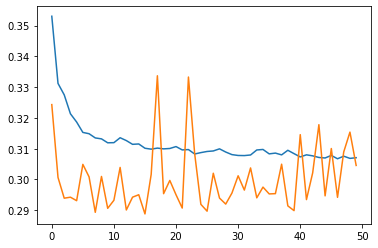

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])